### Importación de datos



In [45]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [46]:
# Estos seran los dataframes, y sus nombres con fines graficos
tiendas  = [tienda, tienda2, tienda3, tienda4]
nombres  = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#1. Análisis de facturación



In [47]:

for i, df in enumerate(tiendas, start=1):
    ingreso = df['Precio'].sum()
    print(f"Ingreso total en tienda {i}: {ingreso}")


Ingreso total en tienda 1: 1150880400.0
Ingreso total en tienda 2: 1116343500.0
Ingreso total en tienda 3: 1098019600.0
Ingreso total en tienda 4: 1038375700.0


Text(0, 0.5, 'Ingreso total')

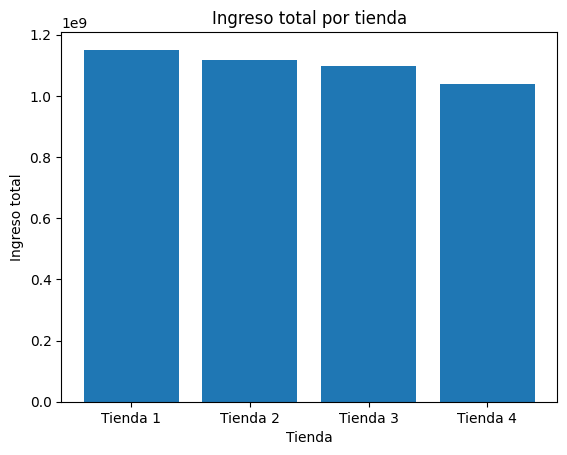

In [48]:
# 1) Ingreso total por tienda
ingresos = [df['Precio'].sum() for df in tiendas]
plt.figure()
plt.bar(nombres, ingresos)
plt.title('Ingreso total por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso total')

# 2. Ventas por categoría

In [49]:

for i, df in enumerate(tiendas, start=1):
    ventas_por_cat = (
        df['Categoría del Producto']
        .value_counts()
        .reset_index()
        .rename(columns={'index': 'Categoría', 'Categoría del Producto': 'Cantidad'})
    )

    print(f"\n--- Tienda {i} ---")
    print(ventas_por_cat)



--- Tienda 1 ---
                  Cantidad  count
0                  Muebles    465
1             Electrónicos    448
2                 Juguetes    324
3        Electrodomésticos    312
4     Deportes y diversión    284
5   Instrumentos musicales    182
6                   Libros    173
7  Artículos para el hogar    171

--- Tienda 2 ---
                  Cantidad  count
0                  Muebles    442
1             Electrónicos    422
2                 Juguetes    313
3        Electrodomésticos    305
4     Deportes y diversión    275
5   Instrumentos musicales    224
6                   Libros    197
7  Artículos para el hogar    181

--- Tienda 3 ---
                  Cantidad  count
0                  Muebles    499
1             Electrónicos    451
2                 Juguetes    315
3        Electrodomésticos    278
4     Deportes y diversión    277
5                   Libros    185
6   Instrumentos musicales    177
7  Artículos para el hogar    177

--- Tienda 4 ---
          

Text(0.5, 1.0, 'Distribución de ventas por categoría\nen todas las tiendas')

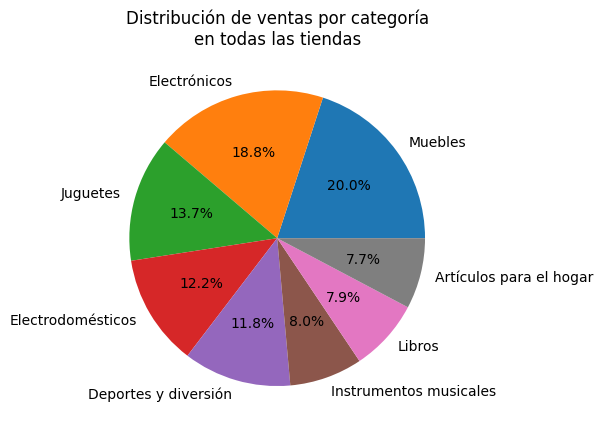

In [50]:

all_df     = pd.concat(tiendas)
cat_counts = all_df['Categoría del Producto'].value_counts()
plt.figure()
plt.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%')
plt.title('Distribución de ventas por categoría\nen todas las tiendas')

# 3. Calificación promedio de la tienda


In [51]:
tiendas = [tienda, tienda2, tienda3, tienda4]

for i, df in enumerate(tiendas, start=1):
    # Calcula el promedio de la columna 'Calificación'
    promedio = df['Calificación'].mean()
    print(f"Tienda {i}: Valoración media = {promedio:.2f}")


Tienda 1: Valoración media = 3.98
Tienda 2: Valoración media = 4.04
Tienda 3: Valoración media = 4.05
Tienda 4: Valoración media = 4.00


# 4. Productos más y menos vendidos

In [52]:

tiendas = [tienda, tienda2, tienda3, tienda4]

for i, df in enumerate(tiendas, start=1):

    ventas = df['Producto'].value_counts()

    # Producto más y menos vendido
    prod_mas   = ventas.index[0]
    cant_mas   = ventas.iloc[0]
    prod_menos = ventas.index[-1]
    cant_menos = ventas.iloc[-1]

    print(f"\n--- Tienda {i} ---")
    print(f"Producto MÁS vendido : {prod_mas} ({cant_mas} unidades)")
    print(f"Producto MENOS vendido: {prod_menos} ({cant_menos} unidades)")



--- Tienda 1 ---
Producto MÁS vendido : Microondas (60 unidades)
Producto MENOS vendido: Celular ABXY (33 unidades)

--- Tienda 2 ---
Producto MÁS vendido : Iniciando en programación (65 unidades)
Producto MENOS vendido: Juego de mesa (32 unidades)

--- Tienda 3 ---
Producto MÁS vendido : Kit de bancas (57 unidades)
Producto MENOS vendido: Bloques de construcción (35 unidades)

--- Tienda 4 ---
Producto MÁS vendido : Cama box (62 unidades)
Producto MENOS vendido: Guitarra eléctrica (33 unidades)


# 5. Envío promedio por tienda

In [53]:

tiendas = [tienda, tienda2, tienda3, tienda4]

for i, df in enumerate(tiendas, start=1):
    # Calcula el promedio de la columna 'Costo de envío'
    envio_promedio = df['Costo de envío'].mean()
    print(f"Tienda {i}: Envío promedio = {envio_promedio:.2f}")


Tienda 1: Envío promedio = 26018.61
Tienda 2: Envío promedio = 25216.24
Tienda 3: Envío promedio = 24805.68
Tienda 4: Envío promedio = 23459.46


Text(0, 0.5, 'Envío promedio')

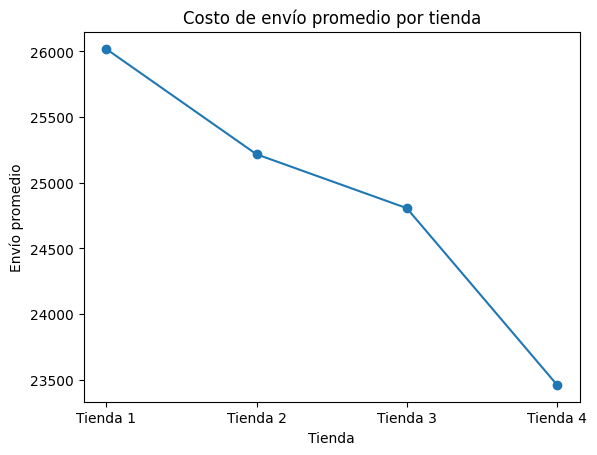

In [54]:
envio_prom = [df['Costo de envío'].mean() for df in tiendas]
plt.figure()
plt.plot(nombres, envio_prom, marker='o')
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Envío promedio')